#### Types of Hyperparameters in Decision Tree
Hyperparameter in decision trees are essential settings that controls the behavior and the structure of the model during the training phase. The major hyperparameters that are used to fine-tune the decision:

 - Criteria : The quality of the split in the decision tree is measured by the function called criteria. The criteria support two types such as gini (Gini impurity) and entropy (information gain).
Gini index - Gini impurity or Gini index is the measure that parts the probability distributions of the target attribute’s values. It splits the node in a way that yields the least amount of impurity.
Information gain - It is an impurity measure that uses the entropy measure to spilt a node in a way that it yields the most amount of information gain.

- max_depth: As the name suggests, max_depth hyperparameter controls the maximum depth to which the decision tree is allowed to grow. When the max_depth is deeper it allows the tree to capture more complex patterns in the training data potentially reducing the training error. However, setting max_depth too high can lead to overfitting where the model memorizes the noise in the training data. It is very important to tune max_depth carefully to find the right balance between model complexity and generalization performance. The input option for max_depth can be a positive integer or ‘None’ that indicates no maximum depth limit. Example: max_depth = 3 limits the tree to three levels, achieving moderate complexity and reducing overfitting risk.

- min_samples_split: The min_sample_split hyperparameter defines the minimal number of samples that are needed to split a node. It should be noted that the min_samples_split works as a threshold to split a node in a decision tree, if the number of samples in a node is less than min_samples_split, the node will not be split and it will turn into a leaf node. The input option for min_samples_split can be an integer that indicates the minimum number of samples necessary in an internal node or it can be a fraction that indicates the minimum percentage of samples needed in an internal node. Example: min_samples_split = 10 ensures a node must have at least 10 samples before splitting.

- min_samples_leaf: The min_samples_leaf hyperparameter defines the required minimal amount of samples to be present at a leaf node. It acts as a threshold for halting the splitting process and designating a node as a leaf. The condition for splitting is that it must leave at least min_samples_leaf samples on both resulting child nodes, this ensures that the splitting process doesn’t continue indefinitely. The input option for min_samples_leaf can either be an integer or float. For example, min_samples_leaf = 5. We set a hyperparameter value of 5 to min_samples_leaf that ensures each leaf node in the decision tree must contain at least 5 samples which prevents further splitting if the node reaches this threshold.

- max_features: The max_features hyperparameter allow us to control the number of features to be considered when looking for the best split in the decision tree. It can either define an exact number of features to consider at each split or as a percentage that represents the proportion of features to consider. The input options can be an integer, float, auto, sqrt, log2. It function as follows:
auto - It allows the decision tree algorithm to consider all the features for each split.
sqrt - It allows the algorithm to consider only the square root of the total number of features for each split
log2 - It allows the algorithm to consider the logarithm base 2 of a total number of features for each split.

- min_weight_fraction_leaf: The min_weight_fraction_leaf hyperparameter that is used to control the tree’s structure based on the weights assigned to each sample. This hyperparameter determines the minimum fraction of input samples required at a leaf node. It also has the potential to deal with class imbalance where one class may have particularly fewer samples than others, to solve the class imbalance we use sample weights. When the decision tree is biased toward the majority classes then it fails to be aware of sample weights like min_sample_leaf. To resolve this issue, weight-based criteria can be used that are quite less challenging to optimize the tree structure if the samples are weighted. The min_weight_fraction_leaf hyperparameter’s leaf node holds at least a fraction of the overall sum of the weights. For example, min_weight_fraction_leaf = 0.1. Here, we set a hyperparameter value of 0.1 which helps us to guarantee that the presence of each leaf node in the decision tree must hold at least 10% if the tidal sum of sample weights potentially helps to address the class imbalance and optimize the tree structure.

## Decision Tree - Classification

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
X=iris.data

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
X_train.shape

(120, 4)

In [7]:
X_test.shape

(30, 4)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf=DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [13]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0

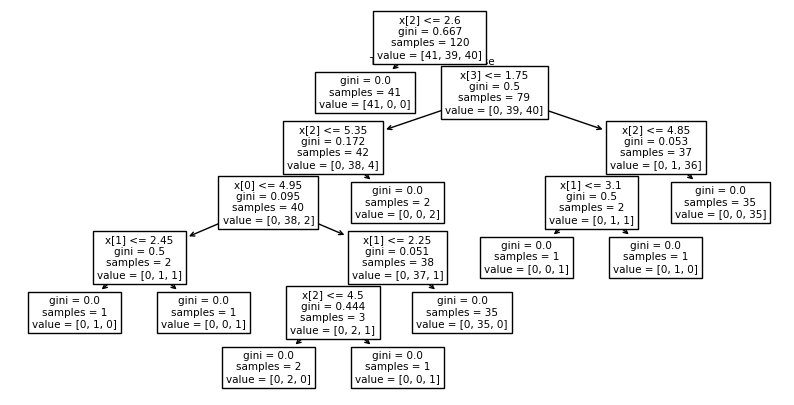

In [84]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plot_tree(clf)

In [15]:
import numpy as np
import pandas as pd

In [16]:
data=pd.read_csv('./Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [18]:
X=data.iloc[:, 1:4].values
y=data.iloc[:,-1].values

In [19]:
X.shape

(400, 3)

In [20]:
y.shape

(400,)

In [21]:
clf1=DecisionTreeClassifier(max_depth=3)

In [22]:
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'x[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239.0, 46.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.375, 0.375, 'x[2] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.625, 'x[1] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 35500.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.875, 0.37

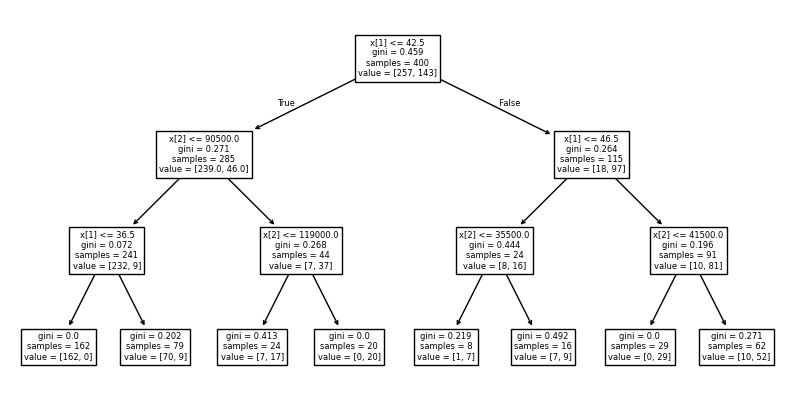

In [83]:
rcParams['figure.figsize'] = 10, 5

plot_tree(clf1)

## Decision Tree - Regression

In [1]:
import pandas as pd
# from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("./Datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [6]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5)

In [7]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [8]:
y_pred = rt.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.8870567236332226

#### Hyperparameter Tuning

In [10]:
param_grid = {
    'max_depth':[2, 4, 5, 8, 10, None],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    # 'max_features':[1, 2, 5, 7, 10, None],
    'min_samples_split':[1, 2, 5, 7, 10, 15]
}

In [11]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [12]:
reg.fit(X_train,y_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\Skill\5. DataScie

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 5, 8, 10, None],
                         'min_samples_split': [1, 2, 5, 7, 10, 15]})

In [13]:
reg.best_score_

0.7547740653505067

In [14]:
reg.best_params_

{'criterion': 'poisson', 'max_depth': 5, 'min_samples_split': 7}

## Feature selection using Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("./Datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [20]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5, random_state=8)

In [22]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, random_state=8)

In [23]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

RM 0.6201912943268669
LSTAT 0.24424105386150965
DIS 0.06864180913263876
CRIM 0.04024483862163899
B 0.01695298526111989
NOX 0.005269623477582718
PTRATIO 0.004458395318642938
ZN 0.0
TAX 0.0
RAD 0.0
INDUS 0.0
CHAS 0.0
AGE 0.0


In [28]:
# Get feature importances 
# X_train, X_test, y_train, y_test 
importances = rt.feature_importances_

# Select features with importance greater than a threshold
threshold = 0.0001  # Adjust as needed
selected_features = X_train.columns[importances >= threshold]

# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [29]:
# Train a new model using the selected features
rt_selected = DecisionTreeRegressor(max_depth=5, random_state=8)
rt_selected.fit(X_train_selected, y_train)

DecisionTreeRegressor(max_depth=5, random_state=8)

In [30]:
# Make predictions on the test set using the model trained with all features
y_pred_all_features = rt.predict(X_test)

# Calculate the accuracy of the model with all features
accuracy_all_features = r2_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")

# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = rt_selected.predict(X_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected_features = r2_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")

Accuracy with all features: 0.7241769835679337
Accuracy with selected features: 0.8851171728306921


## Overfitting and Underfitting

Train Accuracy before pruning: 1.0
Test Accuracy before pruning: 0.9013157894736842


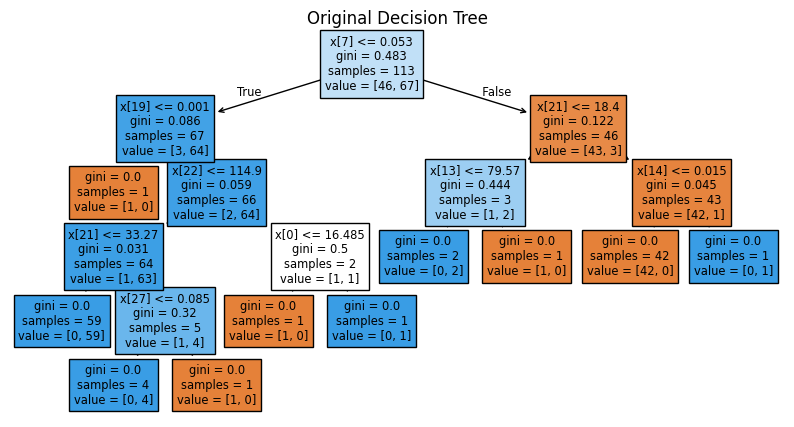

In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Separating Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# Train decision tree model
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
print("Train Accuracy before pruning:", model.score(X_train, y_train))
# Model Accuracy before pruning
accuracy_before_pruning = model.score(X_test, y_test)
print("Test Accuracy before pruning:", accuracy_before_pruning)

# Plot original tree
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()

### Pre-Pruning

In [109]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\Skill\5. DataScie

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [160]:
cv.best_score_

0.9284584980237154

In [161]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [158]:
print("Test Accuracy after pruning:", cv.best_estimator_.score(X_test,y_test))

Test Accuracy after pruning: 0.8969298245614035


Train Accuracy after pruning: 0.9646017699115044
Test Accuracy after pruning: 0.875


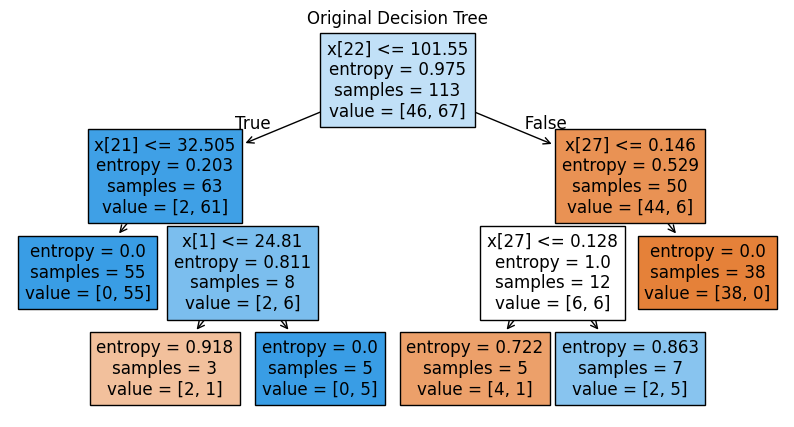

In [162]:
# Train decision tree model
model = DecisionTreeClassifier(criterion= 'entropy',
 max_depth = 3,
 max_features = 'sqrt',
 splitter = 'best')
model.fit(X_train, y_train)
print("Train Accuracy after pruning:", model.score(X_train, y_train))
# Model Accuracy before pruning
accuracy_before_pruning = model.score(X_test, y_test)
print("Test Accuracy after pruning:", accuracy_before_pruning)

# Plot original tree
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()

### Post-Pruning

In [166]:
# Cost-complexity pruning (Post-pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Model Accuracy after pruning
print("Train Accuracy after pruning:", best_pruned_model.score(X_train, y_train))
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)


Train Accuracy after pruning: 0.9646017699115044
Accuracy after pruning: 0.9078947368421053


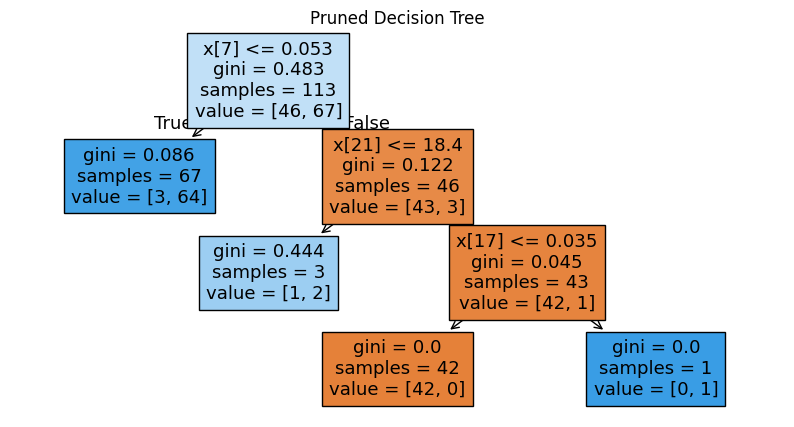

In [168]:
# Plot pruned tree
plt.figure(figsize=(10, 5))
plot_tree(best_pruned_model, filled=True)
plt.title("Pruned Decision Tree")
plt.show()